In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [ ]:
mnist=tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test)=mnist.load_data()

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

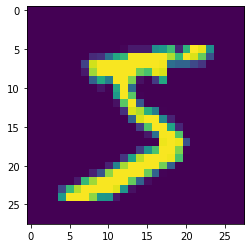

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print(x_train[0])

In [ ]:
print(x_train[0].shape)

(28, 28)


In [ ]:
x_train=x_train/255.0

In [ ]:
x_test=x_test/255.0

In [ ]:
class my_Callback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch, logs={}):
    if (logs.get("accuracy")>0.99):
      print("\n Reached accuracy 99 percent, so cancel training")
      self.model.stop_training=True


In [ ]:
callbacks=my_Callback()

In [ ]:
model=tf.keras.models.Sequential([
                                  tf.keras.layers.Flatten(input_shape=(28,28)),
                                  tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2030 - accuracy: 0.9388
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0806 - accuracy: 0.9749
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0530 - accuracy: 0.9836
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0379 - accuracy: 0.9880
Epoch 5/10
1871/1875 [============================>.] - ETA: 0s - loss: 0.0275 - accuracy: 0.9911
 Reached accuracy 99 percent, so cancel training
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0276 - accuracy: 0.9911


In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0798 - accuracy: 0.9783


[0.07978647202253342, 0.9782999753952026]